In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('Netflixmoviedb.xlsx')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       499 non-null    datetime64[ns]
 1   Title              499 non-null    object        
 2   Overview           499 non-null    object        
 3   Popularity         499 non-null    float64       
 4   Vote_Count         499 non-null    int64         
 5   Vote_Average       499 non-null    float64       
 6   Original_Language  499 non-null    object        
 7   Genre              499 non-null    object        
 8   Poster_Url         499 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 35.2+ KB


In [4]:
df.describe()

,Release_Date,Popularity,Vote_Count,Vote_Average
count,499,499.000000,499.000000,499.000000
mean,2017-05-08 22:21:53.026052096,281.116279,4325.024048,6.724649
min,1950-02-22 00:00:00,105.485000,0.000000,0.000000
25%,2015-04-20 00:00:00,128.321000,117.500000,6.200000
50%,2021-03-24 00:00:00,164.810000,850.000000,7.000000
75%,2021-11-03 12:00:00,240.843000,6596.000000,7.500000
max,2023-06-23 00:00:00,5083.954000,31077.000000,8.600000
std,NaN,408.555196,6254.410059,1.353685


In [6]:
df.duplicated().sum()

np.int64(0)

# Exploration Summary

- We have a dataframe consisting of 499 rows and 9 columns.
- Our dataset looks a bit tidy with no NaNs nor duplicated values.
- Release_Date column needs to extract only the year value.
- Overview, Original_Language, and Poster-Url wouldn’t be so useful during analysis, so we’ll drop them.
- Vote Average should be categorized for proper analysis.
- Genre column has comma-separated values and white spaces that need to be cleaned and also casted into category.

In [7]:
#Release_Date column needs to extract only the year value.
df['Release_Date'] = df['Release_Date'].dt.year
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


# Dropping the not-required columns

In [9]:
colm=['Overview','Original_Language','Poster_Url']
df.drop(colm, axis=1, inplace=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


# Categorizing Vote_Average column into (super hit,hit,average,flop) in a new column[Box_Office]

In [10]:
#define categorizing logic

def categorizing(Vote_Count):
    if Vote_Count >=7.5:
        return 'super hit'
    elif Vote_Count >=5:
        return 'hit'
    elif Vote_Count>=2.5:
        return 'average'
    else:
        return 'flop'

#creating new column
df.insert(loc=5, column='Box_Office', value=df['Vote_Count'].apply(categorizing), allow_duplicates=True)

print(df.head())

   Release_Date                    Title  Popularity  Vote_Count  \
0          2021  Spider-Man: No Way Home    5083.954        8940   
1          2022               The Batman    3827.658        1151   
2          2022                  No Exit    2618.087         122   
3          2021                  Encanto    2402.201        5076   
4          2021           The King's Man    1895.511        1793   

   Vote_Average Box_Office                               Genre  
0           8.3  super hit  Action, Adventure, Science Fiction  
1           8.1  super hit            Crime, Mystery, Thriller  
2           6.3  super hit                            Thriller  
3           7.7  super hit  Animation, Comedy, Family, Fantasy  
4           7.0  super hit    Action, Adventure, Thriller, War  


In [11]:
# Box_offce count

df['Box_Office'].value_counts()

Box_Office
super hit    474
flop          14
hit            6
average        5
Name: count, dtype: int64

# we will split the Genre into a list and then explode our dataframe to have only one genre per row for each movie

In [12]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Box_Office,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,super hit,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,super hit,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,super hit,Science Fiction
3,2022,The Batman,3827.658,1151,8.1,super hit,Crime
4,2022,The Batman,3827.658,1151,8.1,super hit,Mystery


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Release_Date  1421 non-null   int32  
 1   Title         1421 non-null   object 
 2   Popularity    1421 non-null   float64
 3   Vote_Count    1421 non-null   int64  
 4   Vote_Average  1421 non-null   float64
 5   Box_Office    1421 non-null   object 
 6   Genre         1421 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(3)
memory usage: 72.3+ KB


In [14]:
df.nunique()

Release_Date     37
Title           496
Popularity      498
Vote_Count      431
Vote_Average     47
Box_Office        4
Genre            19
dtype: int64

# Casting 'Genre' column into category

In [21]:
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

# Data Visualization

In [23]:
sns.set_style('whitegrid')

# 1. What is the most frequent Genre of movies released on Netflix?

In [24]:
df['Genre'].describe()

count       1421
unique        19
top       Action
freq         214
Name: Genre, dtype: object

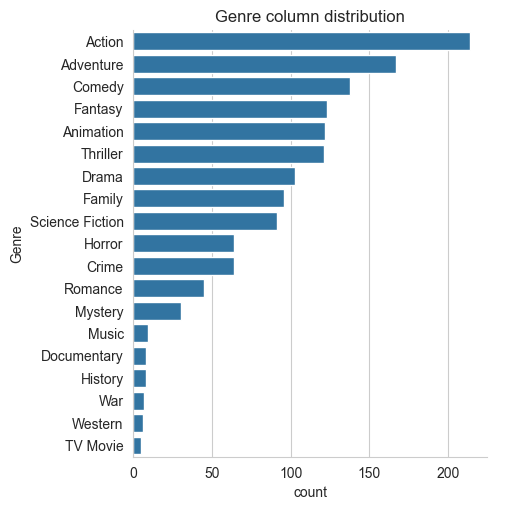

In [36]:
sns.catplot(y='Genre', data=df, kind='count',
            order=df['Genre'].value_counts().index)
plt.title('Genre column distribution')
plt.show()

# 2. What is the Box Office scenario?

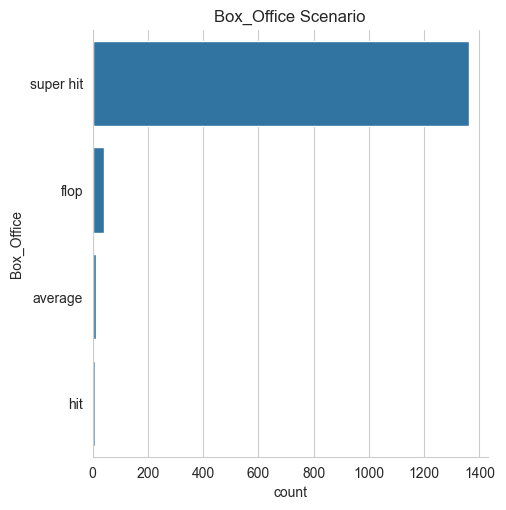

In [27]:
sns.catplot(y='Box_Office', data=df, kind='count',
            order=df['Box_Office'].value_counts().index)
plt.title('Box_Office Scenario')
plt.show()

# 3.What movie got the highest popularity? What it's Genre?

In [31]:
df[df['Popularity']== df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Box_Office,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,super hit,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,super hit,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,super hit,Science Fiction


# 4.What movie got the lowest popularity? What it's Genre?

In [32]:
df[df['Popularity']== df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Box_Office,Genre
1417,2015,Furious 7,105.485,8973,7.3,super hit,Action
1418,2015,Furious 7,105.485,8973,7.3,super hit,Thriller
1419,2015,Furious 7,105.485,8973,7.3,super hit,Crime
1420,2015,Furious 7,105.485,8973,7.3,super hit,Adventure


# 5. Which year has the most filmed movies?

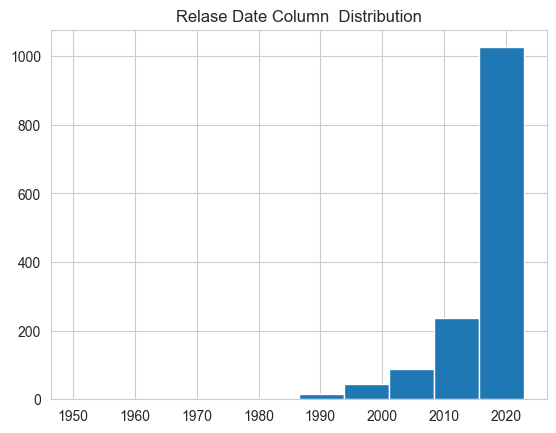

In [34]:
df['Release_Date'].hist()
plt.title('Relase Date Column  Distribution')
plt.show()

# Conclusion

In [ ]:
1. What is the most frequent genre in the dataset?
   Action genre is the most frequent genre in our dataset.

2. What is the Box Office scenario?
   More than 95% of the total movie is Superhit.
      
3. What movie got the highest popularity rate? What’s its genre?
   Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genres of Action, Adventure, and Science Fiction.
       
4. What movie got the lowest popularity rate? What’s its genre?
   Furious 7 has the lowest popularity rate in our dataset and it has genres of Action, Thriller, crime and adventure.
    
5. Which year has the most films in our dataset?
   Year 2020 has the highest filming rate in our dataset
